In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
di = {'Name':['Uwaish','Husain','Khan','Faiz','Aisha'],
     'Age':[20,21,23,21,55],
     'Role':['DS','DS','DA','DA','AI'],
     'Salary':[100,110,115,110,200]}

df = pd.DataFrame(di)

df

,Name,Age,Role,Salary
0,Uwaish,20,DS,100
1,Husain,21,DS,110
2,Khan,23,DA,115
3,Faiz,21,DA,110
4,Aisha,55,AI,200


In [5]:
df.describe()

,Age,Salary
count,5.000000,5.000000
mean,28.000000,127.000000
std,15.132746,41.170378
min,20.000000,100.000000
25%,21.000000,110.000000
50%,21.000000,110.000000
75%,23.000000,115.000000
max,55.000000,200.000000


In [8]:
print("Mean of age:",df['Age'].mean())
print("Median of age:",df['Age'].median())
print("Mode of age:",df['Age'].value_counts())

Mean of age: 28.0
Median of age: 21.0
Mode of age: Age
21    2
20    1
23    1
55    1
Name: count, dtype: int64


In [9]:
# range

age_range = df['Age'].max()-df['Age'].min()

print("Age range:",age_range)

Age range: 35


In [13]:
Q1 = np.percentile(df['Age'],0.25)
Q3 = np.percentile(df['Age'],0.75)

print("Q1 value:",Q1)
print("Q3 value:",Q3)

IQR = Q3-Q1

print("IQR:",IQR)   # it is ignoring the initial and last (25% data)

Q1 value: 20.01
Q3 value: 20.03
IQR: 0.019999999999999574


**If you want to calculate outliers precisely**

In [15]:
# ignoring outlier using IQR

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print("Range is:",round(lower_bound,2),round(upper_bound,2))

Range is: 19.98 20.06


In [18]:
df[(df['Age']>19.98) & (df['Age']<20.06)]

,Name,Age,Role,Salary
0,Uwaish,20,DS,100


**Data is too short for IQR method**

Let's look at data spreadness with respect to outlier

In [20]:
df['Age'].skew()

2.2075381194242083

In [21]:
df['Age'].kurt()

4.89458629698137

**Let's visualize to understand it better**

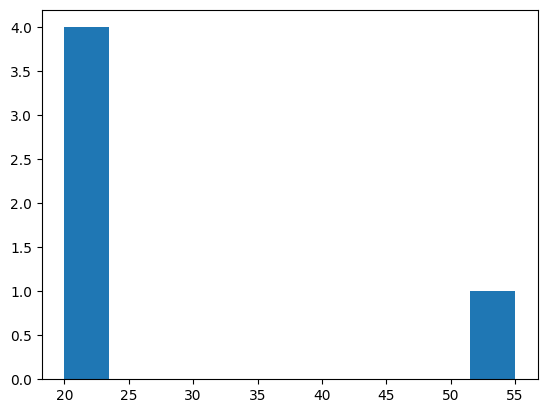

In [23]:
plt.hist(df['Age'])

plt.show()

In [24]:
df = pd.read_csv('FinData.csv')

df

,Segment,Country,Product,Discount Band,Product Cost,Units Sold,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,3,1618.5,20,32370.0,0.00,32370.00,16185.0,16185.00,01-01-2023,1,January,2023
1,Government,Germany,Carretera,NaN,3,1321.0,20,26420.0,0.00,26420.00,13210.0,13210.00,01-01-2023,1,January,2023
2,Midmarket,France,Carretera,NaN,3,2178.0,15,32670.0,0.00,32670.00,21780.0,10890.00,01-06-2023,6,June,2023
3,Midmarket,Germany,Carretera,NaN,3,888.0,15,13320.0,0.00,13320.00,8880.0,4440.00,01-06-2023,6,June,2023
4,Midmarket,Mexico,Carretera,NaN,3,2470.0,15,37050.0,0.00,37050.00,24700.0,12350.00,01-06-2023,6,June,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Small Business,France,Amarilla,High,260,2475.0,300,742500.0,111375.00,631125.00,618750.0,12375.00,01-03-2023,3,March,2023
677,Small Business,Mexico,Amarilla,High,260,546.0,300,163800.0,24570.00,139230.00,136500.0,2730.00,01-10-2023,10,October,2023
678,Government,Mexico,Montana,High,5,1368.0,7,9576.0,1436.40,8139.60,6840.0,1299.60,01-02-2023,2,February,2023
679,Government,Canada,Paseo,High,10,723.0,7,5061.0,759.15,4301.85,3615.0,686.85,01-04-2023,4,April,2023


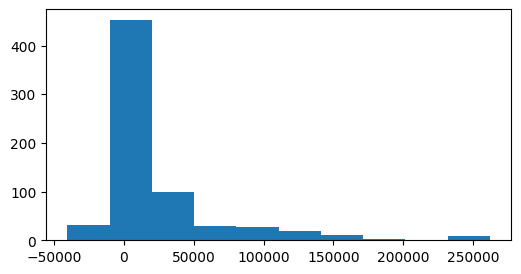

In [30]:
plt.figure(figsize=(6,3))

plt.hist(df['Profit'])

plt.show()

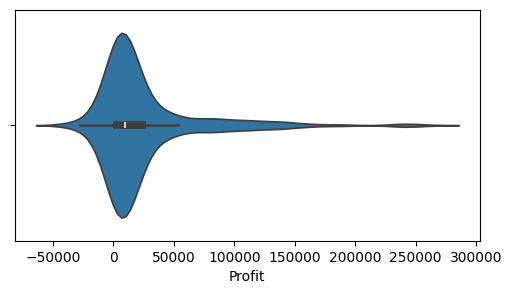

In [31]:
plt.figure(figsize=(6,3))

sns.violinplot(x=df['Profit'])

plt.show()

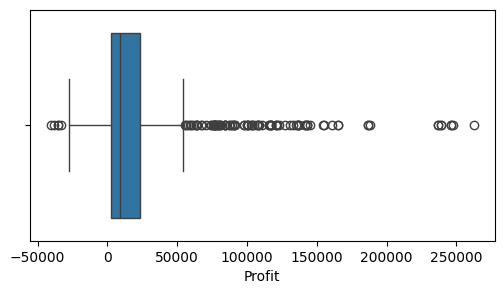

In [32]:
plt.figure(figsize=(6,3))

sns.boxplot(x=df['Profit'])

plt.show()

In [33]:
df['Profit'].describe()

count       681.000000
mean      24619.428106
std       43236.039449
min      -40617.500000
25%        2807.200000
50%        9242.600000
75%       23222.000000
max      262200.000000
Name: Profit, dtype: float64

In [35]:
262200.000000-(-40617.500000)

302817.5

In [36]:
Q3 = np.percentile(df['Profit'],0.75)

Q1 = np.percentile(df['Profit'],0.25)

Q3-Q1

8790.375

In [37]:
df[['Gross Sales','Profit']].corr()

,Gross Sales,Profit
Gross Sales,1.000000,0.785922
Profit,0.785922,1.000000


In [38]:
df[['Discounts','Profit']].corr()

,Discounts,Profit
Discounts,1.0000,0.3854
Profit,0.3854,1.0000


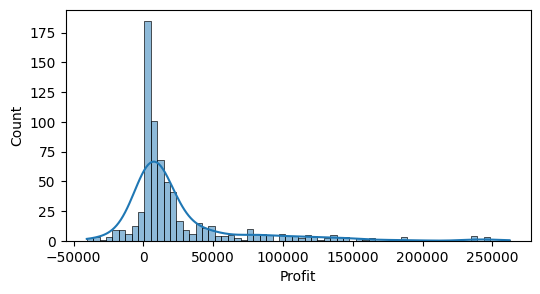

In [40]:
plt.figure(figsize=(6,3))

sns.histplot(df['Profit'],kde=True)

plt.show()